# Problem Statement

# Develop a machine learning model to accurately identify fraudulent credit card transactions among a dataset of European cardholder transactions from the year 2023.

#Roll No.49


In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/creditcard_2023.csv')

In [6]:
df


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [7]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


## Exploratory data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

Here we get to know datatypes and null values in given dataset.There is No null values present in given dataset.

In [9]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [10]:
#CHECKING FOR ANY DUPLICATE
duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [id, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]


In [11]:
#Checking distribution of class column
class_distribution = df['Class'].value_counts()

print(class_distribution)

class_percentage = df['Class'].value_counts(normalize=True) * 100

print(class_percentage)


0    284315
1    284315
Name: Class, dtype: int64
0    50.0
1    50.0
Name: Class, dtype: float64


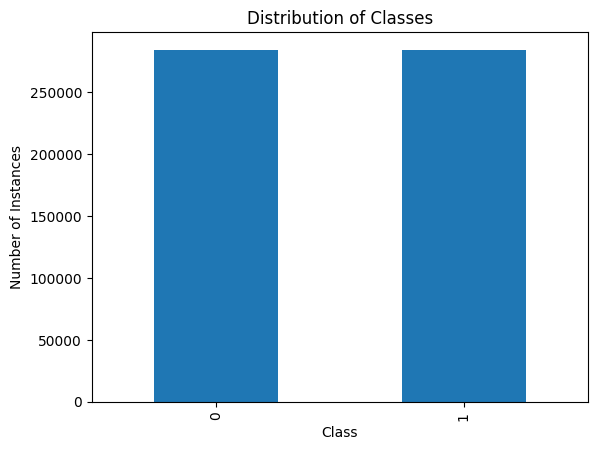

In [12]:
#checking distribution of  target class
df.groupby('Class').size().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()


OBSERVATIONS :-
-> NO NULL VALUES.
-> NO DUPLICATE VALUES
-> NO CATEGORICAL DATA
-> DATA IS BALANCED.

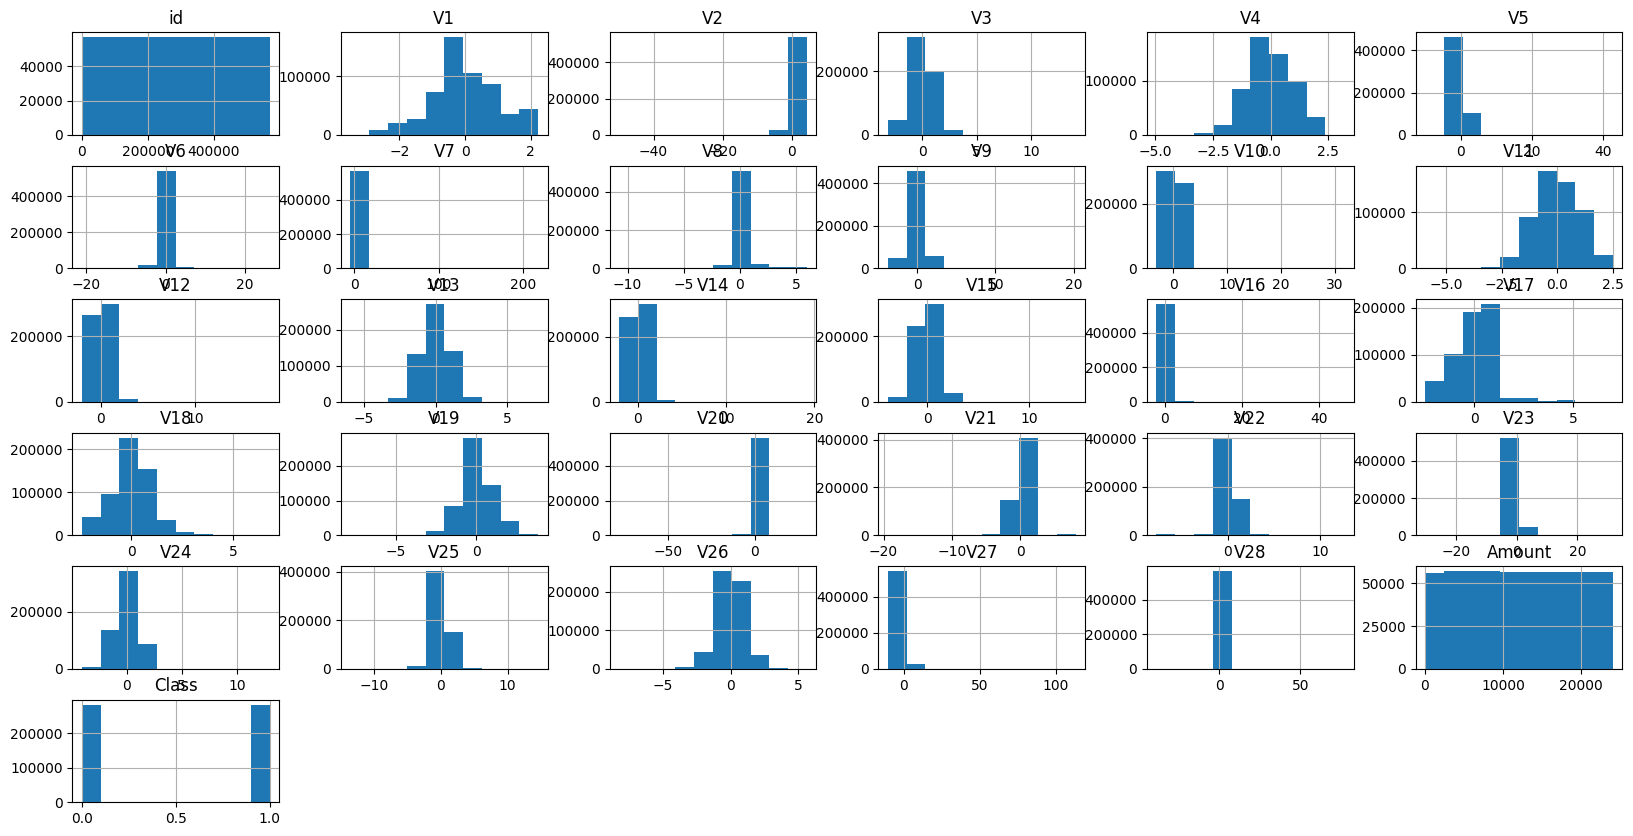

In [13]:
#Checking distribution of all features
plt.rcParams['figure.figsize'] = (20,10)
df.hist()
plt.show()


In [14]:
#correlelation matrix

df.corr()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.395741,0.424267,-0.663655,0.617554,-0.268445,-0.387916,-0.414288,0.121282,-0.508427,...,0.097948,0.036106,0.017594,-0.116685,0.005586,0.052126,0.184195,0.086822,0.001710,0.864283
V1,-0.395741,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,0.424267,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,-0.663655,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,0.617554,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,-0.268445,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,-0.387916,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,-0.414288,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,0.121282,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,-0.508427,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522


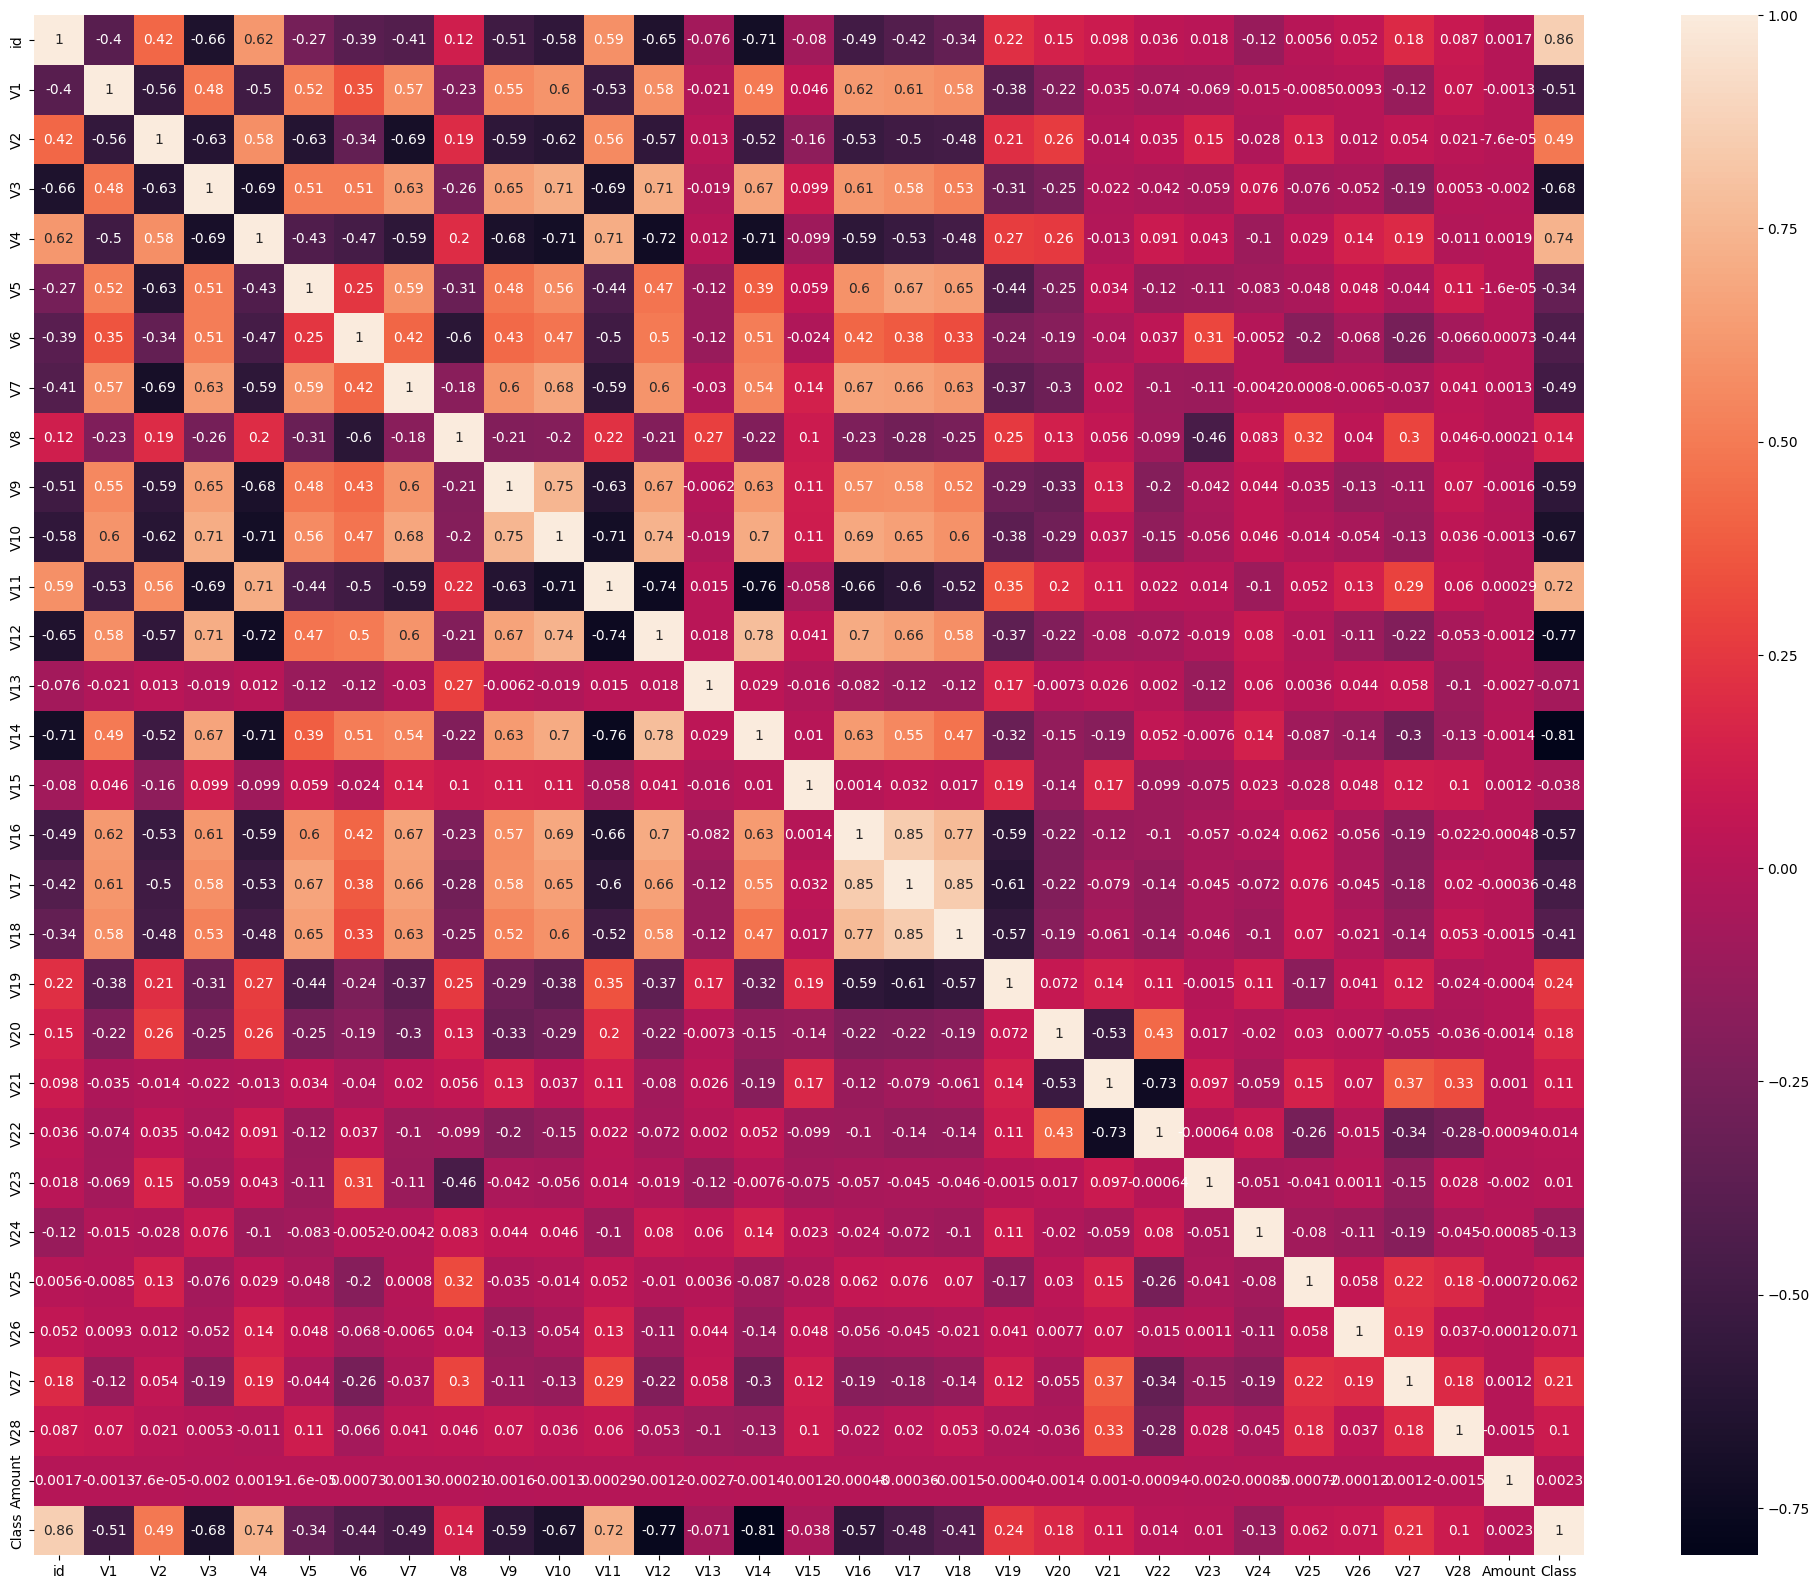

In [15]:
#  generate heatmap,change heatmap size

import seaborn as sns
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()


As we can notice there are some features are irrelevant with respect to target column but as data is anounymous we can't eliminate those features ,they may be important for expected results.

In [18]:
#Defining X and y and standardising columns other than target column
from sklearn.preprocessing import StandardScaler
s = df.drop('Class', axis=1)
scaler = StandardScaler()
s_scaled = scaler.fit_transform(s)
y = df['Class']
x = pd.DataFrame(s_scaled,columns=s.columns)
# The fit_transform method returns a NumPy array, and converting it back to a DataFrame allows to keep the feature names (column names)
# associated with each column.

In [19]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s_scaled, y, test_size=0.2, random_state=1)

# Logistic Regression

In [20]:
#apply logistic regression

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,classification_report

# Splitting the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
report = classification_report(y_test, y_pred)
print('Classification Report:', report)


Accuracy: 0.998382076218279
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



**Accuracy:99%**

In [21]:
# check model's overfitting

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=10)
print("Cross-validation accuracy: %.3f%%" % (np.mean(scores) * 100))


Cross-validation accuracy: 99.468%


In [22]:
# apply Lasso regularization

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)





Lasso(alpha=0.01)

Regularization is done to avoid overfitting,Lasso is used because features are anonymous.

In [39]:
lasso_y_pred = lasso_model.predict(x_test)

In [40]:
# Evaluate using Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lasso_y_pred)
print('Lasso Mean Squared Error:', mse)


Lasso Mean Squared Error: 0.03528579143159524


In [41]:
# applying PCA

from sklearn.decomposition import PCA
# Applying PCA on the training dataset
pca = PCA(n_components=2)
pca.fit(x_train)
# Transforming the training and test data
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)


Applying PCA for Dimentionality Reduction and avoid overfitting.

In [42]:
# apply logistic regression

# Splitting the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Making predictions on the test set
y_pred = model.predict(x_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
report = classification_report(y_test, y_pred)
print('Classification Report:', report)


scores = cross_val_score(model, x, y, cv=10)
print("Cross-validation accuracy: %.3f%%" % (np.mean(scores) * 100))


Accuracy: 0.998382076218279
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Cross-validation accuracy: 99.468%


After appying PCA accuracy of Logistic Regression is same.

# Random Forest

In [27]:
#splitting data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(s_scaled, y, test_size=0.2, random_state=1)

In [28]:
# prompt: apply random forest

from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100)
# Fit the model to the training data
rf_model.fit(x_train, y_train)
# Make predictions on the test data
rf_y_pred = rf_model.predict(x_test)
# Evaluate the model performance
accuracy = accuracy_score(y_test, rf_y_pred)
print('Accuracy:', accuracy)
report = classification_report(y_test, rf_y_pred)
print('Classification Report:', report)


Accuracy: 0.999815345655347
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56926
           1       1.00      1.00      1.00     56800

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



# Support Vector Machines (SVM)

In [29]:
#  apply support vector machine

#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#import svm model
from sklearn.svm import SVC
#create an svm model
model = SVC()
#train the model using training data
model.fit(x_train, y_train)
#make predictions on test data
y_pred = model.predict(x_test)
#evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9996746566308495


In [30]:
#classification report

report = classification_report(y_test, y_pred)
print('Classification Report:', report)


Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [31]:
from sklearn.decomposition import PCA
# Applying PCA on the training dataset
pca = PCA(n_components=2)
pca.fit(x_train)
# Transforming the training and test data
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [32]:
#  applying support vector machine


#import svm model
from sklearn.svm import SVC
#create an svm model
model = SVC()
#train the model using training data
model.fit(x_train, y_train)
#make predictions on test data
y_pred = model.predict(x_test)
#evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9566589873907462


After doing PCA ,SVM gives accuracy 95%.

# XGB Classifier

In [33]:
# applying  XGB classifier

from xgboost import XGBClassifier
# Splitting the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Training the XGBoost model
model = XGBClassifier()
model.fit(x_train, y_train)
# Making predictions on the test set
y_pred = model.predict(x_test)
# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
report = classification_report(y_test, y_pred)
print('Classification Report:', report)


Accuracy: 0.999815345655347
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



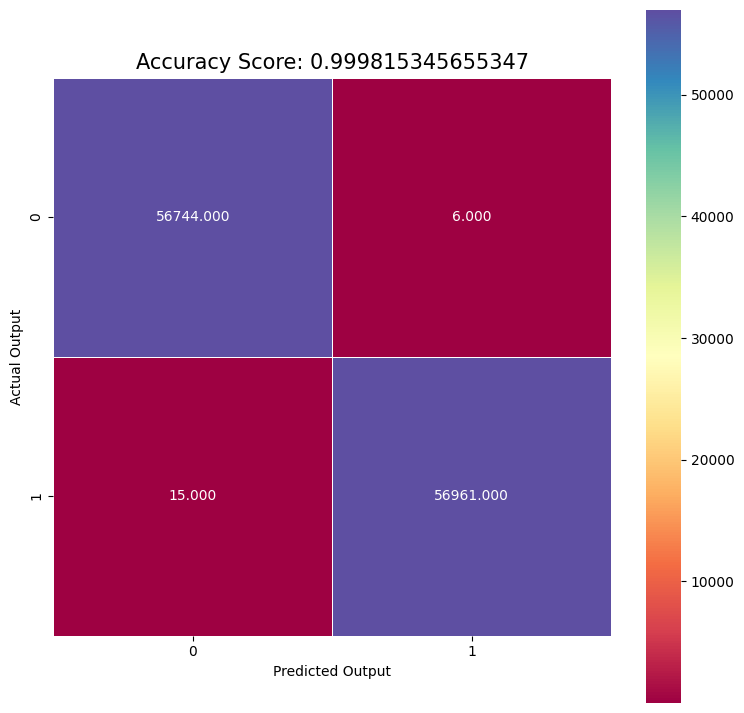

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Spectral')
plt.ylabel('Actual Output')
plt.xlabel('Predicted Output')
score = accuracy_score(y_test, y_pred)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)
plt.show()

In [35]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Training and testing accuracy

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

## creating a confusion matrix for training and testing

train_confusion_matrix = confusion_matrix(y_train,y_train_pred)
test_confusion_matrix =confusion_matrix(y_test,y_test_pred)

In [36]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

print("Confusion Matrix for Training:")
print(train_confusion_matrix)

print("Confusion Matrix for Testing:")
print(test_confusion_matrix)

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix for Training:
[[227565      0]
 [     0 227339]]
Confusion Matrix for Testing:
[[56744     6]
 [   15 56961]]


In [37]:
#install multilayer Perceptron

!pip install keras


# ANN

In [67]:

x= df.iloc[:, :-1].values
y=df.iloc[:,-1].values

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [54]:
#Initializing the ANN
import tensorflow as tf
ann=tf.keras.models.Sequential()

In [55]:
from keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [56]:
#adding input layer
ann.add(Dense(units=164, activation='relu'))

In [57]:
#adding second hidden line
ann.add(Dense(units=64, activation='relu'))

In [58]:
ann.add(Dense(units=28, activation='relu'))

In [59]:
#adding an output layer
ann.add(Dense(units=1, activation='sigmoid'))

In [60]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
#prediction
y_pred=ann.predict(x_test)
y_pred

3554/3554 [==============================] - 4s 1ms/step


array([[0.6172725],
       [0.6440413],
       [0.5501303],
       ...,
       [0.4950414],
       [0.5573999],
       [0.5741604]], dtype=float32)

In [63]:
#fitting
ann.fit(x_train,y_train,batch_size=1000,epochs=100)

Epoch 1/100
455/455 [==============================] - 2s 3ms/step - loss: 0.0281 - accuracy: 0.9917
Epoch 2/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 3/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 4/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 5/100
455/455 [==============================] - 2s 4ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 6/100
455/455 [==============================] - 2s 4ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 7/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 8/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 9/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 10/100
455/455 [==============================] - 1s 3ms/step - loss: 0.0012 - accura

In [64]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming y_pred contains continuous values
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Now you can use the classification metrics with y_test and y_pred_binary
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_binary) * 100, "%")

Confusion Matrix:
 [[ 4045 52679]
 [ 5440 51562]]

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.07      0.12     56724
           1       0.49      0.90      0.64     57002

    accuracy                           0.49    113726
   macro avg       0.46      0.49      0.38    113726
weighted avg       0.46      0.49      0.38    113726


Accuracy Score: 48.89559115769481 %


ANN with Sequential model giving accuracy 48%

# RNN

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [69]:

import tensorflow as tf
from tensorflow import keras

# Assuming your input is a sequence of 30 timesteps, each with one feature.
lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(30, 1), return_sequences=True),
    keras.layers.LSTM(25),
    keras.layers.Dense(1, activation='sigmoid')
])

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm.fit(x_train, y_train, epochs=100, batch_size=1000)

Epoch 1/100
455/455 [==============================] - 60s 127ms/step - loss: 0.2474 - accuracy: 0.9079
Epoch 2/100
455/455 [==============================] - 55s 121ms/step - loss: 0.1325 - accuracy: 0.9527
Epoch 3/100
455/455 [==============================] - 57s 126ms/step - loss: 0.1053 - accuracy: 0.9623
Epoch 4/100
455/455 [==============================] - 55s 121ms/step - loss: 0.0859 - accuracy: 0.9699
Epoch 5/100
455/455 [==============================] - 57s 124ms/step - loss: 0.0745 - accuracy: 0.9739
Epoch 6/100
455/455 [==============================] - 57s 125ms/step - loss: 0.0623 - accuracy: 0.9781
Epoch 7/100
455/455 [==============================] - 58s 129ms/step - loss: 0.0517 - accuracy: 0.9811
Epoch 8/100
455/455 [==============================] - 56s 123ms/step - loss: 0.0432 - accuracy: 0.9837
Epoch 9/100
455/455 [==============================] - 55s 122ms/step - loss: 0.0363 - accuracy: 0.9864
Epoch 10/100
455/455 [==============================] - 56s 123m

In [71]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming y_pred contains continuous values
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Now you can use the classification metrics with y_test and y_pred_binary
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_binary) * 100, "%")

Confusion Matrix:
 [[ 4045 52679]
 [ 5440 51562]]

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.07      0.12     56724
           1       0.49      0.90      0.64     57002

    accuracy                           0.49    113726
   macro avg       0.46      0.49      0.38    113726
weighted avg       0.46      0.49      0.38    113726


Accuracy Score: 48.89559115769481 %


# **Conclusion :**

The page shows how to load, inspect, and preprocess a dataset of credit card transactions from 2023, with the goal of detecting fraudulent transactions.
The dataset has 568,630 rows and 31 columns, with no
missing values or duplicates. The target variable is ‘Class’, which indicates whether the transaction is fraudulent (1) or not (0).The dataset is balanced, with 50% of each class.
1)Logistic Regression with and without PCA gives an Accuracy of 99% ,and withLasso Regularization it is giving an MSE 0.035.

2)Random forest is also giving an accuracy of 99%.
3)SVM without PCA giving an accuracy 0f 99% .And with PCA it is giving an accuracy 95%.
4)XDB is also giving an accuracy of 99%.
5)Deep learning Model (sequential) is giving an accuracy of 48% (with 100 epochs and batch size=1000)
6)RNN(LSTM) is giving an accuracy of 48.89 %.
